<a href="https://colab.research.google.com/github/RamonAlvesPS/Zeros_de_Funcoes-Calc_Numerico-3Metodos/blob/main/M%C3%A9todos_Num%C3%A9ricos_para_Zeros_de_Fun%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos para Zeros de Funções
***
**IFPBCZ**

**Disciplina:** Cálculo Numérico

**Curso:** Controle e Automação

**Professor:** Willian

**Autor:** Ramon Alves P. de Souza

**Data:** 23/04/2025
***

Nesse notebook **abordaremos três métodos** iterativos para **encontrar zeros** reais de funções:
1. Método da Bissecção
2. Método das Cordas (Falsa Posição)
3. Método de Newton-Raphson

## 1. Configuração Inicial
Vamos importar as bibliotecas necessárias e configurar o ambiente.

In [ ]:
# %%
import math
import numpy as np #Biblioteca para cálculos numéricos
import matplotlib.pyplot as plt #Biblioteca para visualização gráfica
from typing import Callable, Tuple, List #Importa tipos de dados para auxiliar na documentação do código


# Configuração de plots
plt.style.use('seaborn-v0_8') # Configura o estilo dos gráficos para 'seaborn' (mais atraente visualmente)
plt.rcParams['figure.figsize'] = (10, 6) # Define o tamanho padrão das figuras como 10x6 polegadas
plt.rcParams['font.size'] = 14 # Define o tamanho da fonte padrão para 14


## 2. Teoria Básica

### Teorema de Bolzano (Teorema do Valor Intermediário)

Seja f(x) contínua em [a, b]. Se f(a) * f(b) < 0, então existe pelo menos um ponto c ∈ (a, b) tal que f(c) = 0.

### Critérios de Parada
1. |f(x)| ≤ ε (erro absoluto na função)
2. |x_{k+1} - x_k| ≤ ε (erro absoluto na variável)
3. |(x_{k+1} - x_k)/x_{k+1}| ≤ ε (erro relativo)
4. Número máximo de iterações atingido

## 3. Método da Bissecção
  * Princípio: Divide o intervalo ao meio e seleciona o subintervalo que contém a raiz.
  * Vantagens:
    - Simples implementação
    - Convergência garantida
  * Desvantagens:
    - Convergência lenta (linear)
    - Requer conhecimento prévio do intervalo

**Algoritmo:**
1. Escolha [a, b] tal que f(a)*f(b) < 0
2. Calcule x = (a + b)/2
3. Se f(x)*f(a) < 0, raiz está em [a, x]
4. Senão, raiz está em [x, b]
5. Repita até satisfazer critério de parada

In [ ]:
# %%
def bisseccao(f: Callable[[float], float],
             a: float,
             b: float,
             tol: float = 1e-6,
             max_iter: int = 100) -> Tuple[float, float, int, List[float]]:
    """
    Implementação do método da bissecção para encontrar zeros de funções.

    Parâmetros:
        f: Função matemática que recebe um float e retorna um float
        a: Limite inferior do intervalo inicial
        b: Limite superior do intervalo inicial
        tol: Tolerância para critério de parada (default 1e-6)
        max_iter: Número máximo de iterações permitidas (default 100)

    Retorna:
        Uma tupla contendo:
        - Aproximação da raiz (float)
        - erro
        - numero de iteracoes
        - Histórico de todas as aproximações (lista de floats)
    """

    if f(a) * f(b) >= 0: # Verifica se o intervalo é válido usando o Teorema de Bolzano
        # Se não for válido, levanta um erro
        raise ValueError("A função deve ter sinais opostos em a e b.")

    historico = [] # Inicializa uma lista vazia para armazenar o histórico de aproximações

    for iteracao in range(max_iter): # Loop principal que executa no máximo 'max_iter' vezes

        x = (a + b) / 2 # Calcula o ponto médio entre a e b

        historico.append(x) # Adiciona a aproximação atual ao histórico
        erro = abs(f(x)) #Erro: Valor absoluto de f(x)

        if erro < tol: # Verifica se o valor da função no ponto x é menor que a tolerância
            return x, erro, iteracao + 1, historico # Se for menor, retorna a aproximação e o histórico

        if f(a) * f(x) < 0: # Decide qual subintervalo contém a raiz
            # Se f(a) e f(x) têm sinais opostos, a raiz está em [a, x]
            b = x # Atualiza o limite superior
        else:
            # Senão, a raiz está em [x, b]
            a = x # Atualiza o limite inferior

    x = (a + b) / 2
    return x, erro, max_iter, historico # Se sair do loop sem convergir, retorna a última aproximação



=== Resultados da Bissecção ===
Raiz encontrada: 1.3247
Erro de aproximação: 1.76e-07
Iterações até convergir: 21 



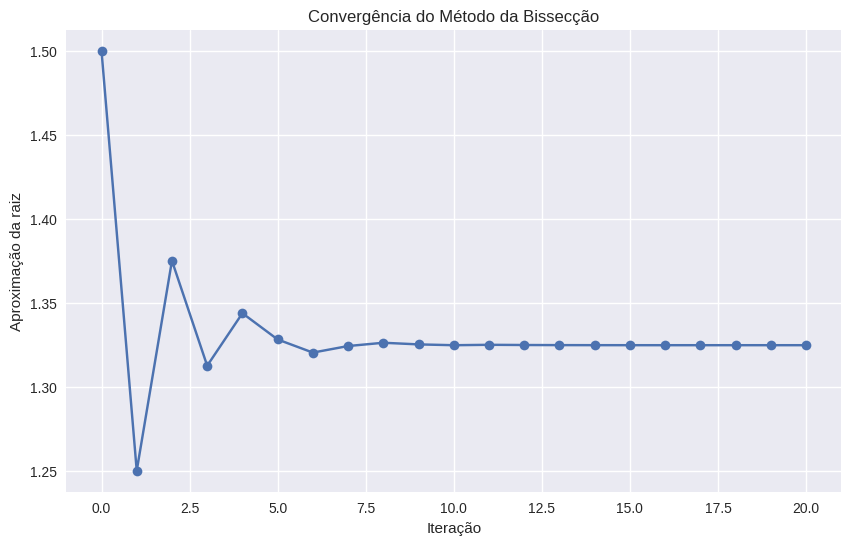

In [ ]:
# Exemplo de uso
def f_exemplo1(x: float) -> float:
    return x**3 - x - 1

raiz_bisseccao, erro_bisseccao, nInter_bisseccao, hist_bisseccao = bisseccao(f_exemplo1, 1, 2, 1e-6)
print("\n=== Resultados da Bissecção ===")
print(f"Raiz encontrada: {raiz_bisseccao:.4f}")
print(f"Erro de aproximação: {erro_bisseccao:.2e}")
print(f"Iterações até convergir: {nInter_bisseccao} \n")

# Plot da convergência
plt.plot(range(len(hist_bisseccao)), hist_bisseccao, 'o-')
plt.xlabel('Iteração')
plt.ylabel('Aproximação da raiz')
plt.title('Convergência do Método da Bissecção')
plt.grid(True)
plt.show()

## 4. Método das Cordas (Falsa Posição)
  * Princípio: Usa uma reta secante entre dois pontos para aproximar a raiz. Similar à bissecção, mas usa interpolação linear em vez de dividir o intervalo ao meio.
  * Vantagens:
    - Mais rápido que a bissecção em alguns casos
    - Convergência garantida
  * Desvantagens:
    - Pode ficar preso em um dos extremos
    - Requer análise do sinal da segunda derivada

**Algoritmo:**
1. Escolha [a, b] tal que f(a)*f(b) < 0
2. Calcule x usando a fórmula da corda
3. Se f(x)*f(a) < 0, raiz está em [a, x]
4. Senão, raiz está em [x, b]
5. Repita até satisfazer critério de parada

In [ ]:
def cordas(f: Callable[[float], float],
          a: float,
          b: float,
          tol: float = 1e-6,
          max_iter: int = 100) -> Tuple[float, float, int, List[float]]:
    """
    Implementação do método das cordas (falsa posição) para encontrar zeros de funções.

    Parâmetros:
        f: Função matemática que recebe um float e retorna um float
        a: Limite inferior do intervalo inicial
        b: Limite superior do intervalo inicial
        tol: Tolerância para critério de parada (default 1e-6)
        max_iter: Número máximo de iterações permitidas (default 100)

    Retorna:
        Uma tupla contendo:
        - Aproximação da raiz (float)
        - erro
        - numero de iteracoes
        - Histórico de todas as aproximações (lista de floats)
    """

    if f(a) * f(b) >= 0: # Verifica se o intervalo é válido usando o Teorema de Bolzano
        raise ValueError("A função deve ter sinais opostos em a e b.")

    historico = [] # Inicializa uma lista vazia para armazenar o histórico de aproximações

    for iteracao in range(max_iter): # Loop principal que executa no máximo 'max_iter' vezes
        x = (a * f(b) - b * f(a)) / (f(b) - f(a)) # Fórmula do método das cordas para encontrar a nova aproximação

        historico.append(x) # Adiciona a aproximação atual ao histórico
        erro = abs(f(x)) #Erro: Valor absoluto de f(x)

        if erro < tol: # Verifica se o valor da função no ponto x é menor que a tolerância
            return x, erro, iteracao + 1, historico

        if f(a) * f(x) < 0: # Decide qual subintervalo contém a raiz
            # Se f(a) e f(x) têm sinais opostos, a raiz está em [a, x]
            b = x # Atualiza o limite superior
        else:
            # Senão, a raiz está em [x, b]
            a = x # Atualiza o limite inferior

    erro = abs(f(x))
    return x, erro, max_iter, historico # Se sair do loop sem convergir, retorna a última aproximação



=== Resultados da 'Cordas' ===
Raiz encontrada: 1.3247
Erro de aproximação: 8.29e-07
Iterações até convergir: 17 



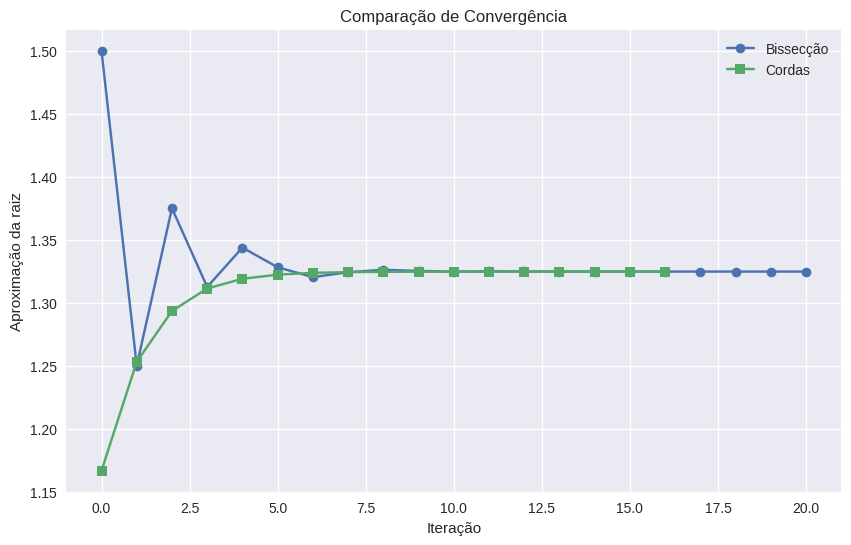

In [ ]:
# Testando com a mesma função
raiz_cordas, erro_cordas, nInter_cordas, hist_cordas = cordas(f_exemplo1, 1, 2, 1e-6)
print("\n=== Resultados da 'Cordas' ===")
print(f"Raiz encontrada: {raiz_cordas:.4f}")
print(f"Erro de aproximação: {erro_cordas:.2e}")
print(f"Iterações até convergir: {nInter_cordas} \n")

# Comparação com bissecção
plt.plot(range(len(hist_bisseccao)), hist_bisseccao, 'o-', label='Bissecção')
plt.plot(range(len(hist_cordas)), hist_cordas, 's-', label='Cordas')
plt.xlabel('Iteração')
plt.ylabel('Aproximação da raiz')
plt.title('Comparação de Convergência')
plt.legend()
plt.grid(True)
plt.show()

## 5. Método de Newton-Raphson
  * Princípio: Usa a tangente à curva para aproximar a raiz.
  * Vantagens:
    - Convergência quadrática (muito rápida)
  * Desvantagens:
    - Requer o cálculo da derivada
    - Pode divergir se a estimativa inicial não for boa

**Algoritmo:**
1. Escolha x0 próximo da raiz
2. Calcule x_{k+1} = x_k - f(x_k)/f'(x_k)
3. Repita até satisfazer critério de parada

In [ ]:
def newton_raphson(f: Callable[[float], float],
                 df: Callable[[float], float],
                 x0: float,
                 tol: float = 1e-6,
                 max_iter: int = 100) -> Tuple[float, float, int, List[float]]:
    """
    Implementação do método de Newton-Raphson para encontrar zeros de funções.

    Parâmetros:
        f: Função matemática que recebe um float e retorna um float
        df: Derivada da função f
        x0: Valor inicial (chute inicial)
        tol: Tolerância para critério de parada (default 1e-6)
        max_iter: Número máximo de iterações permitidas (default 100)

    Retorna:
        Uma tupla contendo:
        - Aproximação da raiz (float)
        - Histórico de todas as aproximações (lista de floats)
    """

    historico = [x0] # Inicializa o histórico com o valor inicial x0

    for iteracao in range(max_iter): # Loop principal que executa no máximo 'max_iter' vezes

        x = x0 - f(x0) / df(x0) # Fórmula de Newton-Raphson para encontrar a próxima aproximação

        historico.append(x) # Adiciona a aproximação atual ao histórico

        erro = abs(f(x)) #Erro: Valor absoluto de f(x)

        # Critérios de parada:
          # 1. Valor da função próximo de zero
          # 2. Diferença entre aproximações consecutivas pequena
        if erro < tol or abs(x - x0) < tol:
            return x, erro, iteracao + 1, historico

        x0 = x # Atualiza x0 para a nova aproximação

    erro = abs(f(x))
    return x, erro, max_iter, historico # Se sair do loop sem convergir, retorna a última aproximação


Raiz encontrada: 1.3247
Erro de aproximação: 9.24e-07
Iterações até convergir: 3 



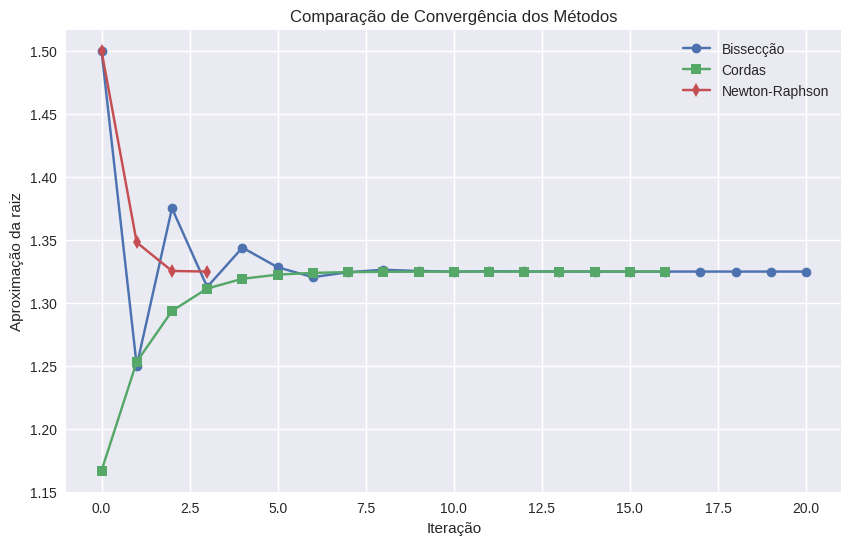

In [ ]:
# Definindo a derivada para nosso exemplo
def df_exemplo1(x: float) -> float:
    return 3 * x**2 - 1

# Testando Newton-Raphson
raiz_newton, erro_newton, nInter_newton, hist_newton = newton_raphson(f_exemplo1, df_exemplo1, 1.5, 1e-6)
print(f"Raiz encontrada: {raiz_newton:.4f}")
print(f"Erro de aproximação: {erro_newton:.2e}")
print(f"Iterações até convergir: {nInter_newton} \n")

# Comparação dos três métodos
plt.plot(range(len(hist_bisseccao)), hist_bisseccao, 'o-', label='Bissecção')
plt.plot(range(len(hist_cordas)), hist_cordas, 's-', label='Cordas')
plt.plot(range(len(hist_newton)), hist_newton, 'd-', label='Newton-Raphson')
plt.xlabel('Iteração')
plt.ylabel('Aproximação da raiz')
plt.title('Comparação de Convergência dos Métodos')
plt.legend()
plt.grid(True)
plt.show()

## 6. Análise Comparativa

Vamos comparar os três métodos em termos de:
- Velocidade de convergência
- Facilidade de implementação
- Requisitos para aplicação

In [ ]:
# Criando uma tabela comparativa
import pandas as pd

data = {
    "Método": ["Bissecção", "Cordas", "Newton-Raphson"],
    "Convergência": ["Linear", "Superlinear", "Quadrática"],
    "Derivada?": ["Não", "Não", "Sim"],
    "Garantia de Convergência?": ["Sim", "Sim", "Não"],
    "Nº Iterações (exemplo)": [len(hist_bisseccao), len(hist_cordas), len(hist_newton)]
}

df_comparacao = pd.DataFrame(data)
display(df_comparacao)

,Método,Convergência,Derivada?,Garantia de Convergência?,Nº Iterações (exemplo)
0,Bissecção,Linear,Não,Sim,21
1,Cordas,Superlinear,Não,Sim,17
2,Newton-Raphson,Quadrática,Sim,Não,4


**Observações:**
1. Bissecção é o mais lento, mas sempre converge
2. Newton-Raphson é o mais rápido, mas precisa da derivada e pode divergir
3. Cordas é um meio-termo entre os dois

## 7. Aplicações Práticas

Vamos resolver alguns problemas reais:

In [ ]:
# Exemplo 1: Cálculo de taxa de juros implícita

def valor_presente(r: float) -> float:
    """Calcula o VP de uma série de pagamentos com taxa r."""
    pagamentos = [100, 100, 100, 1100]  # 3 cupons + principal
    return sum([p / (1 + r)**(i+1) for i, p in enumerate(pagamentos)]) - 950

# Derivada numérica (já que a derivada analítica é complexa)
def derivada_numerica(f: Callable, x: float, h: float = 1e-5) -> float:
    return (f(x + h) - f(x - h)) / (2 * h) # Fórmula das diferenças centrais para aproximar a derivada

# Encontrando a taxa implícita
r, _ = newton_raphson(valor_presente, derivada_numerica, 0.1, 1e-6)

print(f"Taxa implícita: {r*100:.2f}%")
print(f"Convergido em {iteracoes} iterações")
print(f"Erro final: {erro:.2e}")

# Plot da convergência
plt.plot(historico, 'o-')
plt.xlabel('Iteração')
plt.ylabel('Taxa de juros')
plt.title('Convergência para Taxa Implícita')
plt.grid(True)
plt.show()'''

TypeError: derivada_numerica() missing 1 required positional argument: 'x'

**Exercícios:**
1. Implemente o método da secante (variação de Newton que não precisa da derivada)
2. Teste os métodos com a função f(x) = e^x - 5x no intervalo [2.4, 2.6]
3. Modifique os métodos para usar critério de parada por erro relativo


In [ ]:
#Exercicio 01

In [ ]:
#Exercicio 02

In [ ]:
#exercicio 03


## 8. Conclusão

Desse modo, exploramos três métodos fundamentais para encontrar zeros de funções:

1. **Bissecção**: Robusto e simples, mas lento
2. **Cordas**: Mais rápido que bissecção, mantendo garantia de convergência
3. **Newton-Raphson**: Muito rápido quando converge, mas precisa da derivada

**Dicas para uso:**
- Comece com bissecção para isolar a raiz
- Refine com Cordas ou Newton-Raphson
- Sempre verifique a convergência graficamente quando possível